# Methoden en Technieken -- Blok 2

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- B2: Je stelt op basis van requirements een geschikte architectuur voor een AI-oplossing op en selecteert daarvoor passende AI-technieken, gebruik makend van **machine learning**, deep learning, kennisrepresentatie, computer vision, natural language processing en robotica.
- B3: Je prepareert een dataset voor het **trainen en testen** van een AI-model rekening houdend met technische en ethische randvoorwaarden.
- B4: **Je ontwikkelt, traint en evalueert een AI-model** volgens een iteratief proces.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria** die in het vakgebied erkend worden waaronder robustness, **performance**, scalability, explainability, model complexity en resource demand.

In deze opdracht is het de bedoeling om middels een neuraal netwerk de data $(xdat,ydat)$ die hieronder wordt gegeven te benaderen. Het uiteindelijke model behoort,
* de data zo goed mogelijk te benaderen, en
* zo simpel mogelijk te zijn (interpreteerbaarheid van model).

Verantwoord alle keuzes die je maakt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

## Data

In [2]:
def sigma(z):
    return 1/(1+np.exp(-z))

In [3]:
# Verband tussen x en y
def f(x):
    return (2*sigma(5*(x-1)) - 
            1*sigma(6*(x-2)) + 
            3*sigma(4*(x-4)) - 
            5*sigma(7*(x-5)) + 
            3*sigma(3*(x-7)) -
            2*sigma(4*(x-8)))

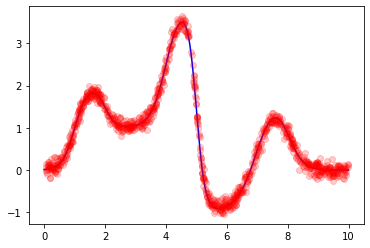

In [4]:
np.random.seed(42)

# Plot echt verband
x = np.linspace(0,10,10001)
y = f(x)
plt.plot(x, y, 'b-')

# Trek en plot data
xdat = np.random.uniform(0,10, size=1000)
ydat = f(xdat) + np.random.normal(scale = 0.1, size = 1000)
plt.plot(xdat, ydat, 'ro', alpha = 0.2)

plt.show()

## Model


### Begin simpel

- De opdracht is om het simpelste model te vinden dat onze doelfunctie goed benaderd. De doelfunctie die we proberen te benaderen bestaat uit een lineaire combinatie van zes sigmoid functies. We beginnen dus met een netwerk met één laag met 6 nodes met sigmoid activatie. Als het lukt dit te fitten zijn we klaar, een simpeler model kan niet complex genoeg zijn om deze functie te benaderen.
- We herschalen en centreren onze data van $[0,10]$ naar $[-1,1]$, zodat onze data in het 'stijle' deel van de activatiefuncties valt.
- De gegenereerde data heeft een ruis term met een MSE van 0.01, hierom gebruiken we de MSE als loss functie en metric, zo kunnen we een goede fit herkennen.
- We stellen de learning rate hoog in, onze parameters moeten immers een redelijk grote sprong van $O(1)$ naar $\pm 30$ maken.

In [5]:
inputs = keras.Input(1)
x = keras.layers.Rescaling(1./5, offset=-1)(inputs)
x = keras.layers.Dense(6, activation='sigmoid')(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.05),
    loss = 'mse',
    metrics = 'mse',
)

hist = model.fit(
    xdat, 
    ydat, 
    epochs=200,
    validation_split=0.2
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 rescaling (Rescaling)       (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


2022-11-15 10:35:18.600038: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
25/25 [==============================] - 1s 14ms/step - loss: 0.9886 - mse: 0.9886 - val_loss: 1.1816 - val_mse: 1.1816
Epoch 2/200
25/25 [==============================] - 0s 6ms/step - loss: 0.9057 - mse: 0.9057 - val_loss: 1.1408 - val_mse: 1.1408
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 0.8881 - mse: 0.8881 - val_loss: 1.1536 - val_mse: 1.1536
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.8789 - mse: 0.8789 - val_loss: 1.1547 - val_mse: 1.1547
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.8754 - mse: 0.8754 - val_loss: 1.1112 - val_mse: 1.1112
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.8573 - mse: 0.8573 - val_loss: 1.0852 - val_mse: 1.0852
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.8373 - mse: 0.8373 - val_loss: 1.0538 - val_mse: 1.0538
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.8357 - 

Epoch 125/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 126/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0549 - mse: 0.0549 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 127/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 128/200
25/25 [==============================] - 0s 5ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 129/200
25/25 [==============================] - 0s 7ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 130/200
25/25 [==============================] - 0s 6ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 131/200
25/25 [==============================] - 0s 8ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 132/200
25/25 [==============================] - 0s 5ms/step - 

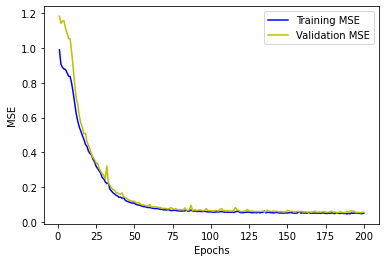

In [6]:
epochs = range(1,len(hist.history['mse'])+1)
plt.plot(epochs, 'mse', 'b-', data=hist.history, label = 'Training MSE')
plt.plot(epochs, 'val_mse', 'y', data = hist.history, label = 'Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

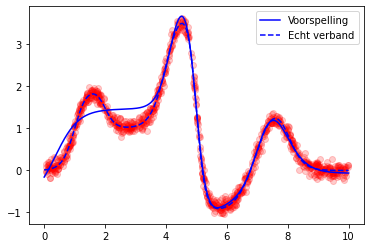

In [7]:
xpred = np.linspace(0,10,10001)
ypred = model.predict(xpred)
plt.plot(xdat, ydat, 'ro', alpha=0.2)
plt.plot(xpred, ypred, 'b-', label = 'Voorspelling')
plt.plot(xpred, y, 'b--', label = 'Echt verband')
plt.legend()
plt.show()

### Maak complexer

Dit werkt niet super goed, het laatste 'bochtje' wil niet fitten. We verdubbelen (uiteindelijk twee maal) het aantal nodes tot we een model vinden (lr = 0.05, 200 epochs) dat wel goed fit.

In [8]:
inputs = keras.Input(1)
x = keras.layers.Rescaling(1./10, offset=-0.5)(inputs)
x = keras.layers.Dense(24, activation='sigmoid')(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.05),
    loss = 'mse',
    metrics = 'mse',
)

hist = model.fit(
    xdat, 
    ydat, 
    epochs=200,
    validation_split=0.2
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 rescaling_1 (Rescaling)     (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 24)                48        
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
25/25 [==============================] - 1s 14ms/step - loss: 1.2313 - mse: 1.2313 - val_loss: 1.1681 - val_mse: 1.1681
Epoch 2/200
25/25 [==============================] - 0s 6ms/ste

25/25 [==============================] - 0s 7ms/step - loss: 0.1785 - mse: 0.1785 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 57/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1792 - mse: 0.1792 - val_loss: 0.1969 - val_mse: 0.1969
Epoch 58/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1728 - mse: 0.1728 - val_loss: 0.1999 - val_mse: 0.1999
Epoch 59/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1712 - mse: 0.1712 - val_loss: 0.1983 - val_mse: 0.1983
Epoch 60/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1711 - mse: 0.1711 - val_loss: 0.1923 - val_mse: 0.1923
Epoch 61/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1740 - mse: 0.1740 - val_loss: 0.1955 - val_mse: 0.1955
Epoch 62/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1707 - mse: 0.1707 - val_loss: 0.1988 - val_mse: 0.1988
Epoch 63/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1701 - mse: 0

25/25 [==============================] - 0s 5ms/step - loss: 0.1305 - mse: 0.1305 - val_loss: 0.1491 - val_mse: 0.1491
Epoch 119/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 120/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 121/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 122/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.1499 - val_mse: 0.1499
Epoch 123/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1380 - val_mse: 0.1380
Epoch 124/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1178 - mse: 0.1178 - val_loss: 0.1360 - val_mse: 0.1360
Epoch 125/200
25/25 [==============================] - 0s 6ms/step - loss: 0.1211 -

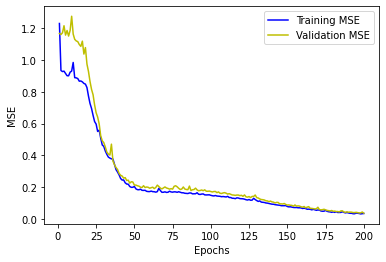

In [9]:
epochs = range(1,len(hist.history['mse'])+1)
plt.plot(epochs, 'mse', 'b-', data=hist.history, label = 'Training MSE')
plt.plot(epochs, 'val_mse', 'y', data = hist.history, label = 'Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

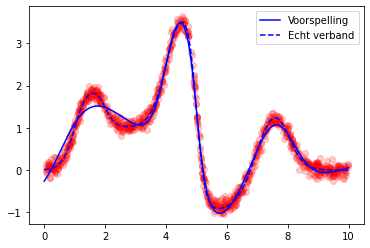

In [10]:
xpred = np.linspace(0,10,10001)
ypred = model.predict(xpred)
plt.plot(xdat, ydat, 'ro', alpha=0.2)
plt.plot(xpred, ypred, 'b-', label = 'Voorspelling')
plt.plot(xpred, y, 'b--', label = 'Echt verband')
plt.legend()
plt.show()

### Versimpel weer
De *hidden* laag heeft 3 keer zoveel sigmoid functies als we zouden willen, dit is veel te complex. We vermoeden ook dat meeste van deze activaties niet zouden hoeven bijdragen aan de voorspelling, het model moet simpeler kunnen. We gaan kijken of een $L_1$ regularisatie op de uitvoer laag 18 van de 24 gewichten op nul stelt.

Na (weer) wat uitproberen vinden we een $L_1$ penalty voor de gewichten van $\lambda = 0.002$, omdat we verwachten dat de bias nul zou moeten zijn stellen we hier een hogere penalty in van $\lambda = 0.005$.

In [11]:
inputs = keras.Input(1)
x = keras.layers.Rescaling(1./10, offset=-0.5)(inputs)
x = keras.layers.Dense(24, activation='sigmoid')(x)
outputs = keras.layers.Dense(
    units = 1, 
    kernel_regularizer = keras.regularizers.L1(0.002), 
    bias_regularizer = keras.regularizers.L1(0.005))(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.05),
    loss = 'mse',
    metrics = 'mse',
)

hist = model.fit(
    xdat, 
    ydat, 
    epochs=300,
    validation_split=0.2
)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 rescaling_2 (Rescaling)     (None, 1)                 0         
                                                                 
 dense_4 (Dense)             (None, 24)                48        
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
25/25 [==============================] - 1s 13ms/step - loss: 1.0188 - mse: 1.0052 - val_loss: 1.2498 - val_mse: 1.2363
Epoch 2/300
25/25 [==============================] - 0s 5ms/ste

Epoch 56/300
25/25 [==============================] - 0s 4ms/step - loss: 0.2171 - mse: 0.1810 - val_loss: 0.2440 - val_mse: 0.2076
Epoch 57/300
25/25 [==============================] - 0s 4ms/step - loss: 0.2165 - mse: 0.1801 - val_loss: 0.2366 - val_mse: 0.1998
Epoch 58/300
25/25 [==============================] - 0s 4ms/step - loss: 0.2120 - mse: 0.1752 - val_loss: 0.2324 - val_mse: 0.1956
Epoch 59/300
25/25 [==============================] - 0s 7ms/step - loss: 0.2149 - mse: 0.1779 - val_loss: 0.2394 - val_mse: 0.2023
Epoch 60/300
25/25 [==============================] - 0s 5ms/step - loss: 0.2101 - mse: 0.1729 - val_loss: 0.2494 - val_mse: 0.2113
Epoch 61/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2163 - mse: 0.1787 - val_loss: 0.2326 - val_mse: 0.1949
Epoch 62/300
25/25 [==============================] - 0s 7ms/step - loss: 0.2114 - mse: 0.1738 - val_loss: 0.2318 - val_mse: 0.1941
Epoch 63/300
25/25 [==============================] - 0s 5ms/step - loss: 0.

Epoch 118/300
25/25 [==============================] - 0s 10ms/step - loss: 0.1485 - mse: 0.1074 - val_loss: 0.1636 - val_mse: 0.1221
Epoch 119/300
25/25 [==============================] - 0s 8ms/step - loss: 0.1466 - mse: 0.1053 - val_loss: 0.1545 - val_mse: 0.1132
Epoch 120/300
25/25 [==============================] - 0s 8ms/step - loss: 0.1447 - mse: 0.1034 - val_loss: 0.1507 - val_mse: 0.1093
Epoch 121/300
25/25 [==============================] - 0s 6ms/step - loss: 0.1424 - mse: 0.1009 - val_loss: 0.1519 - val_mse: 0.1104
Epoch 122/300
25/25 [==============================] - 0s 4ms/step - loss: 0.1390 - mse: 0.0975 - val_loss: 0.1497 - val_mse: 0.1080
Epoch 123/300
25/25 [==============================] - 0s 4ms/step - loss: 0.1393 - mse: 0.0976 - val_loss: 0.1475 - val_mse: 0.1058
Epoch 124/300
25/25 [==============================] - 0s 3ms/step - loss: 0.1427 - mse: 0.1010 - val_loss: 0.1458 - val_mse: 0.1039
Epoch 125/300
25/25 [==============================] - 0s 6ms/step -

25/25 [==============================] - 0s 7ms/step - loss: 0.0564 - mse: 0.0181 - val_loss: 0.0595 - val_mse: 0.0210
Epoch 241/300
25/25 [==============================] - 0s 4ms/step - loss: 0.0558 - mse: 0.0176 - val_loss: 0.0585 - val_mse: 0.0203
Epoch 242/300
25/25 [==============================] - 0s 9ms/step - loss: 0.0549 - mse: 0.0167 - val_loss: 0.0585 - val_mse: 0.0205
Epoch 243/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0545 - mse: 0.0165 - val_loss: 0.0586 - val_mse: 0.0205
Epoch 244/300
25/25 [==============================] - 0s 5ms/step - loss: 0.0571 - mse: 0.0190 - val_loss: 0.0584 - val_mse: 0.0202
Epoch 245/300
25/25 [==============================] - 0s 4ms/step - loss: 0.0552 - mse: 0.0172 - val_loss: 0.0581 - val_mse: 0.0202
Epoch 246/300
25/25 [==============================] - 0s 8ms/step - loss: 0.0549 - mse: 0.0169 - val_loss: 0.0576 - val_mse: 0.0197
Epoch 247/300
25/25 [==============================] - 0s 15ms/step - loss: 0.0552 

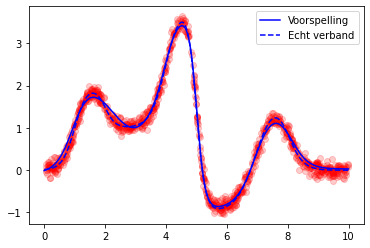

In [12]:
xpred = np.linspace(0,10,10001)
ypred = model.predict(xpred)
plt.plot(xdat, ydat, 'ro', alpha=0.2)
plt.plot(xpred, ypred, 'b-', label = 'Voorspelling')
plt.plot(xpred, y, 'b--', label = 'Echt verband')
plt.legend()
plt.show()

## Interpretatie model

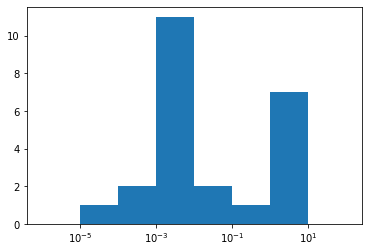

In [13]:
weights = model.get_weights()
plt.hist(abs(weights[2]), bins = np.logspace(-6,2,9))
plt.xscale('log')
plt.show()

In [15]:
sorted(weights[2][abs(weights[2]) > 0.1])

[-4.649512,
 -2.5740955,
 -1.6116796,
 0.59489536,
 1.2456993,
 1.9705064,
 2.4464319,
 2.5048764]

Gevonden functie is een gewogen som van sigmoid functies met bovenstaande acht gewichten 'grote' gewichten, overige gewichten zijn verwaarloosbaar klein. Doel functie had zes gewichten:

$$[-5, -2, -1, 2, 3, 3]$$

Mogelijk kunnen we door nog meer met de $L_1$ penalty te spelen de gewichten van 0.59 en 1.24 kleiner krijgen, dan zouden we inderdaad de echte doelfunctie achterhaald hebben.